
<p><img alt="Colaboratory logo" height="50px" src="https://www.enterprisedb.com/sites/default/files/partner_logos/summan-logo.png" align="left" hspace="10px" vspace="0px"></p>

<h1> Curso de Análisis de datos y Machine Learning en Python</h1>





<p><a name="contents"></a></p>

# Contenido Sesión 1

- <a href="#colabIntro">1. Introducción al Colaboratory de Google</a><br>
- <a href="#pythonIntro">2. Introducción a Python</a><br>



<p><a name="colabIntro"></a></p>

# 1) Introducción a Google Colaboratory

[[Contenidos]](#contents)

Este documento que está leyendo es un [Notebook de Jupyter](https://jupyter.org/), almacenado en el Colaboratory de Google. No es una página estática, se trata de un ambiente interactivo en el cual puede ejecutar scrips en Python, además de otros programas.

Por ejemplo, a continuación se muestra una **celda de código** con un pequeño script de Python que calcula un value, lo almacena en una variable y lo imprime en pantalla:

In [1]:
# A continuación se realiza un cálculo sencillo del número de segundos en un año, se almacena dicho cálculo en la variable secs_per_year y se imprime en pantalla

secs_per_year=365*24*3600

print(secs_per_year)

31536000


Para ejecutar el anterior código, se debe seleccionar haciendo click en la celda, y se debe hacer click el botón "play" a la izquierda de la celda; también puede usar los atajos de teclado "Shift/Ctrl+Enter".

Todas las variables son almacenadas de forma global, de tal manera que se puede usar y modificar en celdas diferentes. En los dos siguientes ejemplos se muestran modificaciones ejecutadas sobre la variable secs_per_year

In [2]:
print("Valor de la variable inicial",secs_per_year)

#Modificación 1 de la variable sec_per_year

secs_per_year=secs_per_year/2;

print("Valor de la variable modificado", secs_per_year)

Valor de la variable inicial 31536000
Valor de la variable modificado 15768000.0


<p><a name="ML"></a></p>

# 2. Modelos basados en datos y Machine Learning

[Contenidos](#contents) 

<p><a name="modelML"></a></p>

## 2.1. Modelos que se pueden construir

[Contenidos](#contents)


¿Qué es un modelo derivado de los datos?

Caso ideal: Sabemos las distribuciones de las que vienen los datos. ⇒ podemos calcular analíticamente nuestro modelo.

¿Podemos encontrar un modelo con 100% de acierto? ¿Por qué sí, o por qué no?



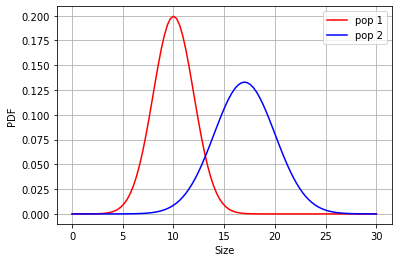

In [3]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt


d1 = stats.norm(loc=10,scale=2)
d2 = stats.norm(loc=17,scale=3)


x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.xlabel('Size')
plt.ylabel('PDF')
plt.grid()
plt.legend();

**Cálculo de la frontera óptima** (conocida también como _frontera bayesiana_).

frontera óptima en 13.15


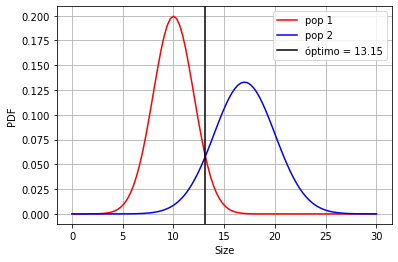

In [4]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print ("frontera óptima en %.2f"%minx)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.axvline(minx, color="black", label=u"óptimo = %.2f"%minx)
plt.xlabel('Size')
plt.ylabel('PDF')
plt.grid()
plt.legend();

Cálculo analítico de los errores de clasificación

In [5]:
print ("pop 1 error", 1-d1.cdf(minx))
print ("pop 2 error", d2.cdf(minx))

pop 1 error 0.05773516274534907
pop 2 error 0.09957961739117976


### Caso 1D

**Caso real**: Tenemos una muestra de los datos 

$\rightarrow$ ¿Cómo determinamos donde poner la frontera?

$\rightarrow$ ¿Qué frontera qusiéramos obtener?

In [0]:
# Función para construir y graficar datasets con dos grupos, rojos y azules, en una dimensión
def show_1D_dataset_samples(n, n_datasets=10, dot_alpha=.5, line_alpha=.5, figsize=(20,5)):
    from sklearn.tree import DecisionTreeClassifier
    plt.figure(figsize=figsize)
    for i in range(n_datasets):

        m1 = d1.rvs(n)
        m2 = d2.rvs(n)
        X = np.append(m1, m2).reshape(-1,1)
        y = np.r_[[0]*len(m1)+[1]*len(m2)]
        estimator = DecisionTreeClassifier(max_depth=1)
        estimator.fit(X,y)
        Xr = np.linspace(5, 30, 100).reshape(-1,1)
        yr = estimator.predict(Xr)
        plt.plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        plt.plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        plt.scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        plt.scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100)
    plt.axis("off")

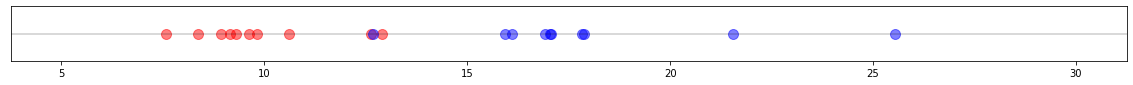

In [7]:
show_1D_dataset_samples(10, n_datasets=1, dot_alpha=.5, line_alpha=0, figsize=(20,1))
plt.axis("on")
plt.ylim(.095, .105)
plt.yticks([])
plt.axhline(.1, color="black", alpha=.2)

Veamos como se puede mejorar la definición de la frontera a medida que aumentamos la cantidad de muestras.

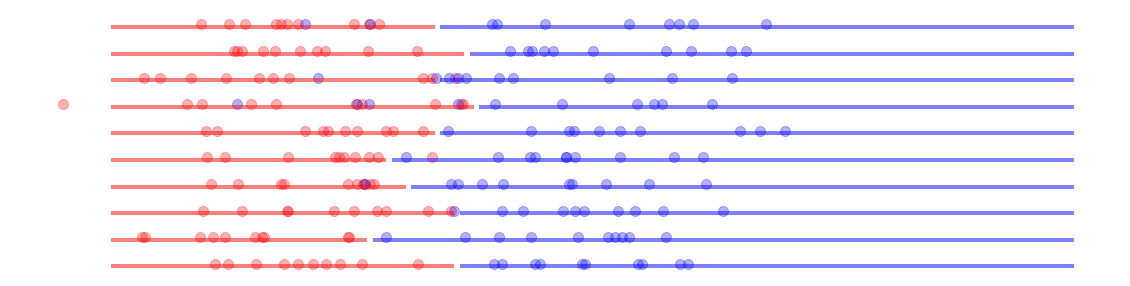

In [8]:
show_1D_dataset_samples(10, dot_alpha=.3)

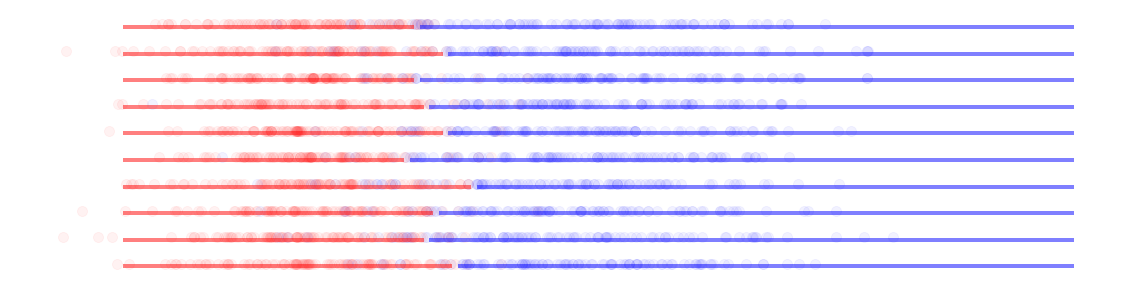

In [9]:
show_1D_dataset_samples(100, dot_alpha=.05)

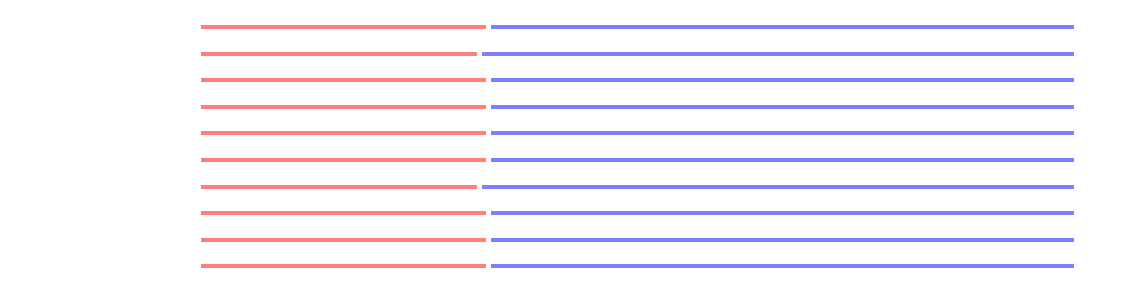

In [10]:
show_1D_dataset_samples(10000, dot_alpha=.001)

### Caso en 2D

- En 2D, un modelo de clasificación **es una frontera** en el plano


- **Objetivo:** hallar la frontera que produce menos error de clasificación


In [11]:
# copiando el archivo mlutils.py en la carpeta local
!wget "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py"

--2019-12-19 18:57:35--  https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10691 (10K) [text/plain]
Saving to: ‘mlutils.py.1’

mlutils.py.1        100%[===================>]  10.44K  --.-KB/s    in 0s      

2019-12-19 18:57:35 (92.5 MB/s) - ‘mlutils.py.1’ saved [10691/10691]



In [0]:
import mlutils 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Muestreo de datos "pseudoaleatoria" para clasificar en dos grupos: rojos, azules

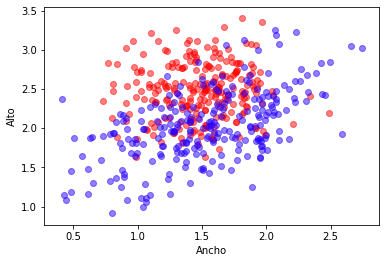

In [17]:
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 2.5], cov0=[[0.1, 0.], [0., 0.1]],
                                        mean1=[1.5, 2.], cov1=[[0.2,0.1],[0.1,.2]])
X,y = mc.sample(500)
mlutils.plot_2Ddata(X, y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador lineal

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


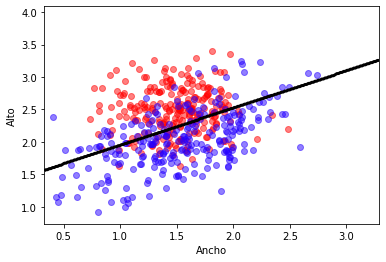

In [18]:
from sklearn.linear_model import LogisticRegression
estimador=LogisticRegression()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador bosque aleatorio

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


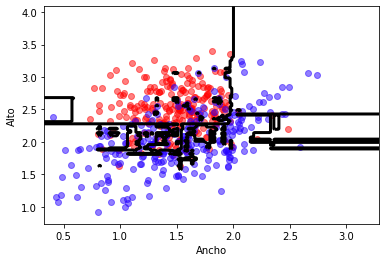

In [19]:
from sklearn.ensemble import RandomForestClassifier
estimador=RandomForestClassifier()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador máquina de soporte vectorial

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


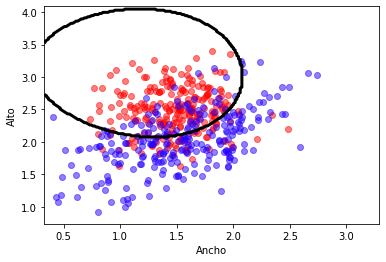

In [20]:
from sklearn.svm import SVC
estimador=SVC()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

**Los algoritmos de machine learning:**

- Los algoritmos de clasificación **calculan fronteras** entre los datos.
- Parten de una muestra de los datos, **no de las distribuciones**.
- Por tanto, **no conocemos** la forma de la frontera bayesiana. O sea, **partimos ciegos**!!!!!!!

Para abordar esta situación, **cualquier algoritmo** tiene necesariamente que plantear una alguna suposición de base:

- los datos vienen de distribuciones normales.
- las columnas son estadísticamente independientes.
- la frontera es lineal, o cuadrática.

Teniendo esto en cuenta, y **partiendo de una muestra de los datos**:

- el objetivo de un usuario de ML es acercarse lo más posible a la **frontera bayesiana** (que no sabemos cómo es).
- distintos algoritmos ML tienen **distintas capacidades** para modelar fronteras (un clasificador lineal no puede captuarar una frontera cuadrática).
- necesitamos dos tipos de herramientas:
   - una buena colección de algoritmos ML.
   - métodos para saber qué tan cerca estamos de la frontera bayesiana.

<p><a name="terms"></a></p>

## 2.2. Terminología

[Contenidos](#contents)

Existen conceptos clave que sientan las bases para una mejor comprensión del ML. Aprenderemos la nomenclatura (términos estándar) que se utiliza para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado.


La estructura tradicional para los datos en el campo del ML tienen la siguiente forma:

![picture](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/12/Table-of-Data-Showing-an-Instance-Feature-and-Train-Test-Datasets.png)

* **Instancia**: A una sola fila de datos se le llama instancia. También se le conoce como una observación del dominio.
* **Característica** (Feature): A una sola columna de datos se le llama característica. Es un componente de una observación y también se denomina atributo de una instancia de datos (La característica se suele asociar con el atributo y su valor, aunque la mayoría de las veces se usa atributo y característica indistintamente). Algunas características pueden ser entradas a un modelo (predictores) y otras pueden ser salidas o las características a predecir (también llamadas *labels*).
* **Datos de entrenamiento**: Conjunto de datos que introducimos a nuestro algoritmo para entrenar nuestro modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión de nuestro modelo pero que no se utiliza para entrenarlo. Puede llamarse conjunto de datos de validación.

Otros términos que utilizaremos frecuentemente son:

* **Parámetros del modelo**: Son aquellos que pertenecen al modelo utilizado para realizar el procedimiento de ajuste
* **Hiperparámetros**: Es un parámetro de un algoritmo de aprendizaje (no del
modelo). Como tal, no se ve afectado por el algoritmo de aprendizaje en sí; debe establecerse antes
al entrenamiento y permanece constante durante el entrenamiento.
* **Métrica**: Medida cuantitativa usada para evaluar el rendimiento del algoritmo.


<p><a name="supML"></a></p>

## 2.3. Aprendizaje supervisado

[Contenidos](#contents)

El aprendizaje supervisado implica de alguna manera modelar la relación entre las características de los datos y alguna etiqueta asociada a estos; una vez que se determina el modelo, se puede usar para asociar etiquetas a datos nuevos y desconocidos. El aprendizaje supervisado se subdivide en clasificación y regresión: En clasificación se tienen etiquetas discretas, mientras que en la regresión, las etiquetas son cantidades continuas.

### 2.3.1 Clasificación: Prediciendo etiquetas discretas.

En clasificación, tenemos un conjunto de puntos etiquetados y deseamos utilizarlos para clasificar algunos puntos no etiquetados. Imaginemos que tenemos los datos que se muestran en la siguiente figura

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-1.png)

Tenemos dos características para cada punto, representadas por las posiciones (x, y). Además, tenemos una de las dos etiquetas de clases para cada punto, representadas por los colores de los puntos. A partir de estas características y etiquetas, nos gustaría crear un modelo que nos permita decidir si un nuevo punto debe etiquetarse como "azul" o "rojo". Un posible modelo es asumir que los dos grupos pueden separarse dibujando una línea recta a través del plano entre ellos, de modo que los puntos a cada lado de la línea caen en el mismo grupo.

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-2.png)

Este modelo es una versión cuantitativa del enunciado "una línea recta separa las clases", mientras que los parámetros del modelo son los números que describen la ubicación y orientación de la línea. Los valores óptimos para estos parámetros se aprenden de los datos (este es el "aprendizaje" en ML), que a menudo se denomina *entrenar el modelo*. Ahora que el modelo ha sido entrenado, se puede generalizar a datos nuevos sin etiquetas. Esta etapa generalmente se llama *predicción*.


<p><a name="nonsupML"></a></p>

## 2.4. Aprendizaje no supervisado

[Contenidos](#contents)


El aprendizaje no supervisado implica modelos que describen datos sin referencia a cualquier etiqueta conocida. Un caso común de aprendizaje no supervisado es el de *agrupamiento* (clustering) en el que los datos se asignan automáticamente a un cierto número de grupos discretos. Por ejemplo, podríamos tener algunos datos bidimensionales

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-1.png)

A simple vista, está claro que cada uno de estos puntos es parte de un grupo distinto. Dada esta entrada, un modelo de agrupamiento utilizará la estructura intrínseca de los datos para determinar qué puntos están relacionados, con un resultado como el siguiente

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-2.png)

Algunos algoritmos de aprendizaje no supervisado son:

* Agrupamiento
  * Jerárquico
  * Basado en densidad
  * k-medias
* Detección de anomalías
* Visualización y reducción dimensional


<p><a name="data"></a></p>

## 2.5. Observaciones acerca de los datos

[Contenidos](#contents)

* **Cantidad insuficiente de datos de entrenamiento**: Se necesitan muchos datos para que la mayoría de los algoritmos de ML funcionen correctamente. Incluso para problemas muy simples, generalmente se necesitan miles de ejemplos, y para problemas complejos como el reconocimiento de imágenes o de voz puede necesitarse millones de ejemplos. 

* **Datos de entrenamiento no representativos**: Para generalizar bien, es crucial que los datos de entrenamiento sean representativos de los nuevos casos que desea generalizar. Al usar un conjunto de entrenamiento no representativo, entrenamos un modelo con el cual es poco probable obtener predicciones precisas. Incluso muestras muy grandes pueden no ser representativas si el método de muestreo es defectuoso (sesgo en el muestreo).

* **Datos de baja calidad**: Obviamente, si los datos de entrenamiento están llenos de errores, valores atípicos y ruido (por ejemplo, debido a mediciones de baja calidad), será más difícil para el algoritmo detectar los patrones subyacentes, por lo que es menos probable que funcione bien. ¡Siempre vale la pena dedicar tiempo a limpiar los datos de entrenamiento!

* **Características irrelevantes**: El sistema solo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes y no demasiadas irrelevantes. Una parte fundamental del éxito de un proyecto de ML es crear un buen conjunto de características para el entrenamiento. Este proceso se conoce como ingeniería de características. 

### ¡Los datos son más importantes que los algoritmos!

<p><a name="pythonIntro"></a></p>

# 2) Introducción a Python

[[Contenidos]](#contents)

El objetivo de la presente sección es el de suministrar al lector una breve introducción al lenguaje Python, y ayudar a los principiantes a familiarizarse con dicho lenguaje.

<p><a name="sections"></a></p>

#Secciones

- <a href="#mods">2.1. Módulos</a><br>
- <a href="#ayuda">2.2. Ayudas y descripciones</a><br>
- <a href="#vars">2.3. Variables y tipos</a><br>
 - <a href="#syms">2.3.1. Nombres de variables</a><br>
  - <a href="#asign">2.3.2. Asignación</a><br>
  - <a href="#ftypes">2.3.3. Tipos fundamentales</a><br>
- <a href="#ops&comps">2.4. Operadores y comparaciones</a><br>
 - <a href="#mscut">2.4.1. Atajos de operaciones matemáticas y asignaciones</a><br>
- <a href="#sltd">2.5. Strings, Listas y diccionarios</a><br>
 - <a href="#strings">2.5.1. Strings</a><br>
 - <a href="#alist">2.5.2. List</a><br>
 - <a href="#tuples">2.5.3. Tuplas</a><br>
 - <a href="#diccionarios">2.5.4. Diccionarios</a><br>
- <a href="#indent">2.6. Intentación</a><br>
- <a href="#controlFlow">2.7. Control Flow</a><br>
 - <a href="#cond">2.7.1. Sentencias condicionales: if, elif, else </a><br>
- <a href="#iter">2.8. Ciclos lógicos </a><br>
 - <a href="#cicl">2.8.1 Ciclos for y while </a><br>
 - <a href="#contr">2.8.2 Sentencias de control de bucles</a><br>
- <a href="#func">2.9. Funciones y clases </a><br>
 - <a href="#funci">2.9.1. Funciones</a><br>
 - <a href="#class">2.9.2. Clases </a><br>
- <a href="#inout">2.10. Archivos de entrada y salida (I/O) </a><br>
 - <a href="#lecte">2.10.1. Lectura de entrada de teclado </a><br>
 - <a href="#apyci">2.10.2. Apertura y cierre de archivos</a><br>
 - <a href="#leyes">2.10.3. Leer y escribir archivos </a><br>
 - <a href="#subar">2.10.4. Subir y leer archivos </a><br>
 - <a href="#des">2.10.5. Descargar archivos en el sistema local </a><br>
 - <a href="#goodr">2.10.6. Google drive: Paquete Pydrive </a><br>
 - <a href="#git">2.10.7. Github </a><br>

<p><a name="mods"></a></p>

##2.1. Módulos

[[Secciones]](#sections)

La mayoria de funcionalidades en Python estan proporcionadas por los módulos. Para poder usar un módulo en un programa de Python lo primero que se debe realizar es importarlo mediante la sentencia **import**. Por ejemplo, para importa el módulo *math*, el cual contiene gran variedad de funciones matemáticas, podemos hacer lo siguiente

In [0]:
import math

La línea de código anterior implica la importación de todo el módulo, haciéndolo disponible para su uso posterior dentro del programa. Por ejemplo, podemos usar funciones triconométricas para calcular algún valor y almacenarlo en una variable:

In [18]:
x = math.cos(2*math.pi)
x

1.0

En lugar de importar una librería completa, lo que puede llevar a un tiempo de ejecución o un consumo de memoria innecesario, podemos escoger importar unas cuantas funciones del módulo haciendo explicito cuales de ellas queremos importar. Por ejemplo, podemos elegir importar solo las funciones $cos$ y el valor de $\pi$:

In [19]:
from math import cos, pi

x = cos(2*pi)
x

1.0

También es posible asignarle un nombre de acceso a los modolus o símbolos que se importan mediante el uso de **as**:

In [20]:
import numpy as np
from math import pi as number_pi

#A continuación, convertímos el número pi de radianes a grados.

x = np.rad2deg(number_pi)
x

180.0

In [0]:
import matplotlib

In [22]:
dir()

['In',
 'LogisticRegression',
 'Out',
 'RandomForestClassifier',
 'SVC',
 'X',
 '_',
 '_18',
 '_19',
 '_20',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'accuracy_score',
 'cos',
 'd1',
 'd2',
 'estimador',
 'exit',
 'get_ipython',
 'math',
 'matplotlib',
 'mc',
 'minx',
 'mlutils',
 'np',
 'number_pi',
 'optimize',
 'pi',
 'plt',
 'quit',
 'secs_per_year',
 'show_1D_dataset_samples',
 'stats',
 'train_test_split',
 'x',
 'y']

In [0]:
del matplotlib

<p><a name="ayuda"></a></p>

## 2.2. Ayudas y descripciones

[[Secciones]](#sections)

Mediante el uso de la función $help$, se puede obtener una descripción de casi todas las funciones. Por ejemplo, para obtener una descripción de la funcion $log$ de la libreria $math$ ejecutamos el siguiente comando:

In [24]:
help(math.log)

Help on built-in function log in module math:

log(...)
    log(x[, base])
    
    Return the logarithm of x to the given base.
    If the base not specified, returns the natural logarithm (base e) of x.



Tambien puede obtener la ayuda poniendo el sígno interrogante (?) al final de la expresión, así:

In [0]:
math.log?

In [26]:
math.log(10)

2.302585092994046

In [27]:
math.log(10,2)

3.3219280948873626

In [28]:
math.log(10,10)

1.0

<p><a name="vars"></a></p>

## 2.3. Variables y tipos

[[Secciones]](#sections)


<p><a name="syms"></a></p>

### 2.3.1. Variables y tipos

Los nombres de las variables en Python pueden contener caracteres alfanuméricos *a-z*, *A-Z*, *0-9* y algunos caracteres especiales como _. Los nombres de las variables deben comenzar con una letra. 

Por convención, los nombres de las variables comienzan con letras minúsculas, y los nombres de las Clases con letras mayúsculas.

Adicionalmente, existe un número de palabras claves que no pueden ser usadas como nombres de variables. Estas palabras claves son:

> `and, as, assert, break, class, continue, def, del, elif, else, except, exec, finally, for, from, global, if, import, in, is, lambda, not, or, pass, print, raise, return, try, while, with, yield`



<p><a name="asign"></a></p>

### 2.3.2. Asignación.

En Python, el operado de asignación es "=".  Python es un lenguaje de tipado dinámico, de tal forma que no es necesario asignarle un tipo a la variable cuando es creada.

La asignación de un valor a una variable crea la variable. Por ejemplo:

In [0]:
# asignación a una variable

x = 1.0

Aunque no se hizo explicito, la variable tiene un tipo asociado a ella. El tipo de la variable puede deducirse del valor que le fue asignado. También podemos consultar el tipo mediante la función `type`:

In [30]:
type(x)

float

Si asignamos a la variable un nuevo valor, su tipo puede cambiar:

In [31]:
x = 1
type(x)

int

Si intentamos usar una variable que no ha sido definida aun, obtenemos un error `NameError` (Nótese que usarémos en los notebooks los bloques `try/except` para tratar las excepciones, de tal forma que el notebook no se interrumpa). 

En el siguiente código, intentaremos usar la función `print` de tal forma que si ocurre la excepción `NameError`, se imprime un mensaje en pantalla; de lo contrario, se generará un error. Más adelante, en el presente notebook, se estudiará mas detalladamente el manejo de excepciones.

 

In [32]:
print(y)

[0. 0. 0. ... 1. 1. 1.]


In [33]:
try:
    print(y)
except(NameError) as err:
    print("NameError", err)
else:
    raise

[0. 0. 0. ... 1. 1. 1.]


RuntimeError: ignored

<p><a name="ftypes"></a></p>

### 2.3.3. Tipos fundamentales.

En Python, los tipos fundamentales son 





1.   Enteros (int).
2.   Punto flotante (float).
3.   Buleanos (boolean)
4.   Cadena de caracteres (strings).

Veamos algunos ejemplos de estos tipos:






In [0]:
# integers

x = 1
type(x)

In [0]:
# float 

x = 1.0
type(x)

In [0]:
# boolean

b1 = True
b2 = False

type(b1), type(b2)

In [0]:
# string
s = "Hola Mundo"

type(s)



In [0]:
ss='chao mundo'
type(ss)

In [0]:
var1=25
print(type(var1))
var2=str(var1)
print(type(var2))

In [0]:
var3=int('23')

In [0]:
var3+5

In [0]:
float('25.5')+3

<p><a name="ops&comps"></a></p>

## 2.4. Operadores y comparaciones.

[[Secciones]](#sections)

La mayoria de operadores y comparaciones poseen el significado al que, comunmente, estamos acostumbrados.
<br>
<br>
*   Operadores aritméticos  `+`, `-`, `*`, `/`, `**` (potencia), `%` (módulo)




In [0]:
[1 + 2, 1 - 2, 1 * 2, 5 % 3]

En Python 2.7, el tipo de división (/) que se ejecute, depende del tipo de números involucrados. Si todos los números son enteros, la división será una divión entera, de lo contrario, será una operación en coma flotante. En Python 3, este hecho ha cambiado y las fracciones no se pierden cuando se dividen dos enteros (para las divisiones enteras se puede usar el operdor //)

In [0]:
# En Python 3 las siguientes dos operaciones daran el mismo resultado.
# En Python 2, la primera de ellas será tratada como una división entera.

print(1/2)
print(1/2.0)
print(11//6.0)

In [0]:
# Nótese que la potenciación en Python se escribe de la forma ** y
# no como ^

2**2


*   Los buleanos están conectados o precedidos por palabras como `and`, `not`, `or`.



In [0]:
True and False

In [0]:
not False

In [0]:
True or False



*   Operadores de comparación `>`, `<`, `>=`(mayor o igual), `<=` (menor o igual), `==` (igual), `!=`(no igual) y `is` (identico).


In [0]:
2>1,2<1

In [0]:
2>3,2<2

In [0]:
4<=4,4>=4

In [0]:
#igual a
[3,2]==[3,2]

In [0]:
# Not equal to

2 != 5

In [0]:
4==4.0

In [0]:
4 is 4.0

*   Operador buleano

In [0]:
x = True
y = False

print(not x)
print(x and y)
print(x or y)

*   Comparación de strings

In [0]:
"estar bien" in "Me gusta estar bien" 

In [0]:
"Estar" not in "Me gusta estar bien"

In [0]:
"Estar"=="estar"

<p><a name="mscut"></a></p>

### 2.4.1 Atajos de operaciones matemáticas y asignaciones.

[[Secciones]](#sections)

Por ejemplo, la siguiente asignación y operación:


In [0]:
a = 2
a = a*2
print(a)

el comando `a = a * 2`, puede ser abreviado como `a *= 2`. Este tipo de abreviaciones funcionan con las siguientes operaciones `+=`, `-=`, y `/=`.

In [0]:
a = 4
a *= 4 #a=a*4
print(a)

In [0]:
lol=True

<p><a name="sltd"></a></p>

## 2.5. Strings, listas y diccionarios.

[[Secciones]](#sections)

<p><a name="strings"></a></p>

###2.5.1 Strings

Las variables que se usan para guardar un mensaje, palabra, etc, se conocen como `strings`

In [0]:
s = "Hola mundo"
type(s)

In [0]:
# Longitud del string: Número de caracteres en el string
len(s)

In [0]:
# Reemplazo de un substring dentro de un string
s2 = s.replace("mundo","alumnos")
print(s2)

Podemos indexar los caracteres en un string mediante el uso de `[]`

In [0]:
s[0],s[1],s[2]

Se debe tener cuidado ya que la indexación en Python empieza en 0.

Es posible extraer parte de un string usando la sintaxis `[start:stop]`, en donde se extraen los caracteres entre la posiciones `start` y `stop`:

In [0]:
s[0:4]

Si omitimos en el intervalo el `start` o el `stop`, se toma por defecto el princio y el final de string, respectivamente

In [0]:
s[:4]

In [0]:
s[5:]

In [0]:
s[:]

También podemos definir el tamaño del paso usando la sintaxis `[inicio:final:paso]`(el valor por defecto del paso es 1, como se vio anteriormente)

In [0]:
s[::1]

In [0]:
s[::3]

A esta técnica se le conoce con el nombre se *slicing*.

**Ejemplos de formatos de strings**

In [0]:
#Contatenación de strings con +
print("Común"+"mente")

In [0]:
#La función print concatena dependiendo de como son las entradas.
#A continuación se muestran tres resultados diferentes 

print("Común" "mente")
print("Común","mente")
print(("Común","mente"))

In [0]:
#Por otra parte, la función print convierte todos las entradas a strings
print("Común", 1.0, False)

In [0]:
# Podemos usar la función print en forma similar a como es usada en C

print("value = %f" %3.343569)

Python posee dos estilos de formatos. Un estilo más antiguo, en el que se especifica, por ejemplo, el número de cifras decimales que se imprimirá tendrá un número de tipo float denotado por %n.f y %.d, que transforma un número en un string, correspondiente a un numero decimal.  

In [0]:
s2 = "value1 = %.3f value2 = %4d" % (5863.1415, 10.5)
print(s2)

El mismo string puede ser definido usando el nuevo estilo de formato

In [0]:
s3 = 'value1 = {:.2f}, value2 = {}'.format(3.1415, 1.5)

print(s3)
type(s3)

In [0]:
print("Las líneas nuevas son indicadas por \nlos espacios por \t.")


In [0]:
print(r"Las líneas nuevas son indicada por \n y los espacios por \t. r indica raw string")

In [0]:
s4="Nombre: {}\nNúmero: {}\nString: {}".format("Python", 2019, 4 * "-")
print(s4)

In [0]:
strString = """String
con varias
líneas de texto."""
print(strString)


In [0]:
print("Esto {verbo} una {sujeto}.".format(sujeto = "prueba", verbo = "es"))

<p><a name="alist"></a></p>

### 2.5.2. Listas

[[Secciones]](#sections)

Las listas son muy similares a los `strings` con la excepción de que los elementos de una lista pueden ser de cualquier tipo.

La sintaxis en Python es de la forma `[...]`.

In [0]:
l=[0,1,2,3]
print(type(l))
print(l)

Podemos usar las mismas técnicas de *slicing* que usamos en los *strings

In [0]:
print(l[:])
print(l[0:2])
print(l[::2])

Recuerden que la indexación inicia en 0



In [0]:
l[0]

Los elementos de una lista no tiene que ser todos del mismo 

In [0]:
l = [1, 'a', 1.0]

Las listas en Python inhomogeneas y anidadas arbitrariamente:


In [0]:
nested_list = [1, [2, [3, [4, [5]]]]]
nested_list

In [0]:
nested_list[1][1][0]

Las listas desempeñan un papel muy importante en Python y, por ejemplo, se utilizan en bucles y otras estructuras de control de flujo (que se analizan a continuación). Hay una serie de funciones convenientes para generar listas de varios tipos, por ejemplo, la función de `range` (tenga en cuenta la función `range` de Python 3 crea un generador, por lo que tiene que usar la función de lista para obtener una lista):

In [0]:
inicio = 1
final = 16
paso = 2

range(inicio, final, paso)

In [0]:
inicio = 1
final = 16
paso = 2

list(range(inicio, final, paso))

In [0]:
# Convertir un string en una lista casteando mediante list

print(s)

s2 = list(s)

s2

In [0]:
# Organización de la lista
s2.sort()

print(s2)

***Adición, inserción, modificación y remoción de elementos de una lista***


In [0]:
# Creación de una lista vacía
l = []

# Adición de elementos usando `append`
l.append("A")
l.append("d")
l.append("d")

print(l)

Podemos modificar una lista al asignar nuevos valores a elementos de esa lista, es decir, las listas son *mutables*.



In [0]:
l[1] = "p"
l[2] = "t"

print(l)

In [0]:
l[1:3] = ["s", "m"]

print(l)

Inserción de elementos mediante `insert`.


In [0]:
l.insert(0, "i")
l.insert(1, "n")
l.insert(2, "s")
l.insert(3, "e")
l.insert(4, "r")
l.insert(5, "t")

print(l)

Remoción del primer elemento de un valor específico mendiante `remove`



In [0]:
l.remove("A")

print(l)

Remoción de un elemento en una posición específica usando `del`



In [0]:
del l[7]
del l[6]

print(l)

<p><a name="tuples"></a></p>

### 2.5.3. Tuplas

[[Secciones]](#sections)

Las tuplas son como las listas, excepto que estas no pueden ser modificadas una vez se han creado, es decir, son inmutables.

En Python, las tuplas son creadas usando la sintaxis (..., ..., ...), incluso ..., ...:

In [0]:
point = (10, 20)

print(type(point))
print(point)

In [0]:
point[0]

Si intentamos asignar un nuevo valos a un elemento de la tupla, obtenemos un error:



In [0]:
try:
    point[0] = 20
except(TypeError) as er:
    print("TypeError:", er)
else:
    raise


In [0]:
nuevaL=list(point)

<p><a name="diccionarios"></a></p>

### 2.5.4. Diccionarios

[[Secciones]](#sections)

Los diccionarios son también parecidos a las listas, excepto que cada elemento es una pareja clave-valor. La sintaxis en los diccionarios es de la forma {key1 : value1, ...}:



In [0]:
params = {"parameter1" : 1.0,
          "parameter2" : 2.0,
          "parameter3" : 3.0,}

print(type(params))
print(params)

In [0]:
params = {"parameter1" : [1.0,2.0,3.0],
          "parameter2" : 2.0,
          "parameter3" : 3.0,}

print(type(params))
print(params)

A las entradas de los diccionarios solo puede accerderse mediante el nombre de la clave.


In [0]:
params["parameter2"]

In [0]:
params.keys()

In [0]:
params.values()

In [0]:
print("parameter1 = " + str(params["parameter1"]))
print("parameter2 = " + str(params["parameter2"]))
print("parameter3 = " + str(params["parameter3"]))

In [0]:
params["parameter1"] = "A"
params["parameter2"] = "B"

# add a new entry
params["parameter2.5"] = "D"

print("parameter1 = " + str(params["parameter1"]))
print("parameter2 = " + str(params["parameter2"]))
print("parameter3 = " + str(params["parameter3"]))


<p><a name="indent"></a></p>

## 2.6. Indentación

[[Secciones]](#sections)

Los espacios en blanco son importantes en Python. De hecho, los espacios en blanco al comienzo de una línea son importantes. A esto se le conoce como *indentación*. Los espacios en blanco iniciales (espacios y tabuladores) al comienzo de la línea lógica se usan para determinar el nivel de indentación de la línea lógica, que a su vez se usa para determinar la agrupación de declaraciones.


Esto significa que las declaraciones que van juntas deben tener la misma indentación, por ejemplo:

In [0]:
i = 5

print('El valor es ', i)
print('Repetimos, el valor es ', i)

Cada uno de estos conjuntos de declaraciones se llama un bloque. Veremos ejemplos de cómo los bloques son importantes más adelante. Una cosa que debes recordar es que la indentación incorrecta conlleva a `IndentationError`.

<p><a name="controlFlow"></a></p>

## 2.7. Control del flujo

[[Secciones]](#sections)

<p><a name="cond"></a></p>

### 2.7.1. Condicionales: if, elif, else
La sintaxis en Python para la ejecución de una condición  consiste en las palabras claves `if`, `elif` (else if), `else`:

In [0]:
a=5
b=6

lol= a<b

if lol:
    print("a es menor que b")

elif a>b:
    print("a es mayo que b")

else:
    print("a es igual a b")

In [0]:
statement1 = True
statement2 = True

if statement1:
    print("statement1 es Verdadero")

elif statement2:
    print("statement2 es Verdadero")

else:
    print("statement1 y statement2 son Falsos")

También podemos tener sentencias if anidadas

In [0]:
val = 100
if val < 200:
  print("El valor es menor a 200")
  if val == 150:
    print("es 150")
  elif val == 100:
    print("es 100")
  elif val == 50:
    print("es 50")
  elif val < 50:
    print("el valor es menor a 50")
else:
  print("El valor es mayor a 200")

<p><a name="iter"></a></p>

## 2.8. Iteraciones y ciclos lógicos

En general, las instrucciones se ejecutan secuencialmente: la primera instrucción en una función se ejecuta primero, seguida de la segunda, y así sucesivamente. Puede haber una situación en la que necesite ejecutar un bloque de código varias veces.  Una instrucción de bucle nos permite ejecutar una instrucción o un grupo de instrucciones varias veces.

<p><a name="cicl"></a></p>

### 2.8.1. Ciclos for y while

El ciclo for ejecuta una secuencia de sentencias un número determinado de veces

In [0]:
range(5)

In [0]:
suma=0
for i in range(5):
  suma+=i #suma=suma+1
  print('i=',i,'suma=',suma)

También podemos iterar sobre listas

In [0]:
vocales=["a","e","i", "o","u"]
for i in vocales:
  print(i)

In [0]:
for i in range(len(vocales)):
  print (i,vocales[i])

In [0]:
x,y=40,45
print(x)
print(y)

In [0]:
for idx, valor in enumerate(vocales):
  print(idx,valor)

El ciclo while repite una sentencia o grupo de sentencias mientras una condición dada es TRUE. Prueba la condición antes de ejecutar el cuerpo del ciclo.

In [0]:
c = 4
while c > 0:
  print('c=',c,'se cumple la condición')
  c-=1

Podemos tener varias condiciones

In [0]:
c = 10
while c > 0:
  if c > 1 and c!=5:
    print ("Voy a hacerlo "+str(c-1)+" veces más")
  elif c==5:
    print('Voy en '+str(c-1))
  else:
    print ("¡Este es el último!")
  c -= 1 #c=c-1

Podemos usar uno o más ciclos dentro de otro. Esto lo conocemos como ciclos anidados


In [0]:
for i in range(2):
  for j in range(5):
    print("i: %d j: %d" %(i,j))

<p><a name="contr"></a></p>

### 2.8.2. Sentencias de control de ciclo: break y continue.


Las sentencias de control de ciclo cambian la ejecución de su secuencia normal. Cuando la ejecución deja un ámbito, todos los objetos automáticos que se crearon en ese ámbito se destruyen.

La sentencia de control *break* termina el ciclo actual y reanuda la ejecución en la siguiente instrucción.



In [0]:
for x in vocales:
  if x=="o": break
  print(x)

La sentencia de control *continue* rechaza todas las declaraciones restantes en la iteración actual del ciclo y mueve el control de nuevo a la parte superior de este




In [0]:
for i in vocales:
  if i=="o":
    continue
  print(i)

<p><a name="func"></a></p>

## 2.9. Funciones y clases

<p><a name="funci"></a></p>

### 2.9.1. Funciones

Una función es un bloque de código organizado y reutilizable que se utiliza para realizar una única acción relacionada. Las funciones proporcionan una mejor modularidad para su aplicación y un alto grado de reutilización de código.

>`def Nombre(arg1,arg2,...):`
>> `sentencias`

Definamos la función exponencial $a^b$

In [0]:
def Exp(a,b):
  exp = a**b

  return exp
  
 

In [0]:
Exp(2,3) 

In [0]:
varExp=Exp(2,3) 

In [0]:
varExp

La sentencia *return* termina la función,  devolviendo opcionalmente uno o varios valores. Una declaración de retorno sin argumentos es lo mismo que devolver *none* (como en el caso anterior)

In [0]:
def Exp(a,b):
  return a**b
  
def Exp2(a,b):
  return a**b,a**b+1,a**b+2

print(Exp(2,2),type(Exp(2,2)))

print(Exp2(2,2),type(Exp2(2,2)))


In [0]:
def operaciones(a,b):
  suma=a+b
  resta=a-b
  mult=a*b
  div=a/b
  return suma, resta, mult, div

In [0]:
s,r,m,d=operaciones(10,5)

In [0]:
print(s)
print(r)
print(m)
print(d)

<p><a name="class"></a></p>

### 2.9.2 Clases

Las clases proporcionan un medio de agrupar datos y "funcionalidad". La creación de una nueva clase crea un nuevo tipo de objeto, lo que permite crear nuevas *instancias* de ese tipo. Cada instancia de la clase puede tener sus propios atributos. Las instancias de una clase también pueden tener *métodos* (definidos por su clase) para modificar su estado.

>class Name():
>>sentencias

Los atributos son como propiedades que queremos añadir a la clase 

In [0]:
class Auto():
  marca = ''
  color = ''

Creemos un objeto de la clase Auto con algunos atributos

In [0]:
mi_auto = Auto()
mi_auto.marca = 'ferrari'
mi_auto.color = 'rojo'

print(mi_auto.marca)
print(mi_auto.color)

Dentro de las clases podemos definir funciones, conocidas como *métodos* 

In [0]:
class Persona():
  nombre = ''
  edad = ''
  
  def print_nombre(self):
    print('nombre:',self.nombre)
    
  def print_edad(self):
    print('edad:',self.edad)
    
carolina = Persona()
carolina.nombre = 'carolina'
carolina.edad = 20

carolina.print_nombre()
carolina.print_edad()

Los métodos necesitan tener un argumento convenientemente llamado self, que se refiere al objeto del método que está siendo llamado. Podemos pasar más de un argumento si así lo deseamos

In [0]:
class Persona:
    nombre = ''
    edad = ''
     
    def print_informacion(self, nombre, edad):
        print('nombre:',self.nombre)
        print('edad:',self.edad)
             
carlos = Persona()
carlos.nombre = 'carlos'
carlos.edad = '30'
carlos.print_informacion(carlos.nombre, carlos.edad)

La operación de creación de instancias crea un objeto vacío. A muchas clases les gusta crear objetos con instancias personalizadas a un estado inicial específico. Por lo tanto, una clase puede definir un método especial llamado __init __ (), como este:

In [0]:
class Person:
  def __init__(self,n,e):
    self.nombre = n
    self.edad = e

mario = Person('mario','55')
print('nombre:',mario.nombre)
print('edad:',mario.edad)  


In [0]:
juan=Person('Juan', '20')

<p><a name="inout"></a></p>

## 2.10. Archivos de entrada y salida

<p><a name="lecte"></a></p>

### 2.10.1. Lectura de entrada de teclado

Python proporciona una función integrada <code>input()</code> para leer una línea de texto de la entrada estándar

In [0]:
a = input('Ingresa un número ')
print('El número que ingresaste es:',a)
type(a)



independientemente de lo que ingrese como entrada, la función <code>input()</code> siempre lo convierte en una cadena de caracteres. Podemos utilizar las funciones <code>int()</code> y <code>float()</code> para obtener enteros y números de punto flotante respectivamente

In [0]:
numero_entero = int(input('Ingresa in unúmero'))
print(numero_entero,type(numero_entero))

numero_pflotante = float(input('Ingresa un número'))
print(numero_pflotante,type(numero_pflotante))

<p><a name="apyci"></a></p>

### 2.10.2. Apertura y cierre de archivos

Python proporciona funciones básicas y métodos necesarios para manipular archivos de forma predeterminada. Se puede realizar la mayor parte de la manipulación de archivos utilizando un objeto tipo <code>file</code>. Antes de poder leer o escribir un archivo, debemos abrirlo con la función <code> open() </code>incorporada de Python. Para cerrarlo utilizamos la función <code>close()</code>.

In [0]:
fo = open("foo.txt", "w")
print("Nombre del archivo: ", fo.name)
print('Modo con el que se abrió el archivo:',fo.mode)
print('Cerrado:',fo.closed)
fo.close()
print('Cerrado:',fo.closed)

Modos comunes: w (Escritura), r (Lectura), a (Añadir)

<p><a name="leyes"></a></p>

### 2.10.3. Leer y escribir archivos

El objeto <code>file</code> proporciona un conjunto de métodos de acceso para facilitar nuestras vidas. Veríamos cómo usar los métodos <code>write()</code> y <code>read()</code> para leer y escribir archivos.

In [0]:
fo = open("foo.txt", "w")
fo.write( "¡Hola \n mundo!")
fo.close()

!cat foo.txt

In [0]:
fo = open("foo.txt", "r")

print(fo.readline())

#print(fo.read())

#print(fo.read(2))

fo.close()

<p><a name="subar"></a></p>

### 2.10.4. Subir archivos locales

El método <code>files.upload</code> devolverá un diccionario de los archivos que se han subido. Al diccionario se le asignará el nombre del archivo como clave y los valores serán los datos que se han subido (los archivos permanecen en la máquina virtual por 12 horas)

In [0]:
from google.colab import files

uploaded = files.upload()

<p><a name="des"></a></p>

### 2.10.5. Descargar archivos en tu sistema local 

El método <code>files.download</code> invocará al navegador para que descargue el archivo en tu ordenador local.

In [0]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

<p><a name="goodr"></a></p>

### 2.10.6. Google drive: Paquete PyDrive

Instalamos el paquete

In [0]:
!pip install --upgrade --quiet PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Nos autenticamos

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Subir un archivo al Drive

In [0]:
uploaded = drive.CreateFile({'title': 'Sample upload.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Descargar un archivo del Drive

In [0]:
i='1kKIxeYVO6Ixe4TNxrmwDgSvVrBMHel37'
downloaded = drive.CreateFile({'id': i})
downloaded.GetContentFile('Sample upload.txt') 
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
#la "id" es lo que va después del = : https://drive.google.com/open?id=1kKIxeYVO6Ixe4TNxrmwDgSvVrBMHel37